# Analiza klientów
Załadowanie biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

# Połączenie z bazą SQL

In [2]:
conn = pyodbc.connect ('DRIVER={SQL Server};SERVER=WIN-KNV22QSAF5I\PRACA_DYPLOMOWA;DATABASE=AdventureWorks2017;Trusted_Connection=yes;')

# Załadowanie danych

In [3]:
query = "SELECT * FROM CustomerView"

df = pd.read_sql(query, conn)
pd.options.display.float_format = '${:,.2f}'.format
print(df.head())
df.head()

   CustomerID        CustomerName PersonType   StoreID  \
0       29825  Hendergart,  James         SC $1,046.00   
1       29672  Collins, J. Takiko         SC   $722.00   
2       29734     Elson, E. Jauna         SC   $852.00   
3       29994  McGuigan, M. Robin         SC $1,418.00   
4       29565    Bischoff,  Jimmy         SC   $484.00   

                         StoreName        Country  SalesOrderID  OrderDate  \
0                 Better Bike Shop  United States         43659 2011-05-31   
1                 Pedals Warehouse  United States         43660 2011-05-31   
2  Original Bicycle Supply Company         Canada         43661 2011-05-31   
3              Health Spa, Limited         Canada         43662 2011-05-31   
4        World Bike Discount Store  United States         43663 2011-05-31   

     DueDate   ShipDate SalesOrderNumber PurchaseOrderNumber   AccountNumber  \
0 2011-06-12 2011-06-07          SO43659         PO522145787  10-4020-000676   
1 2011-06-12 2011-06-0

,CustomerID,CustomerName,PersonType,StoreID,StoreName,Country,SalesOrderID,OrderDate,DueDate,ShipDate,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,SubTotal,TaxAmt,Freight,TotalDue
0,29825,"Hendergart, James",SC,"$1,046.00",Better Bike Shop,United States,43659,2011-05-31,2011-06-12,2011-06-07,SO43659,PO522145787,10-4020-000676,"$20,565.62","$1,971.51",$616.10,"$23,153.23"
1,29672,"Collins, J. Takiko",SC,$722.00,Pedals Warehouse,United States,43660,2011-05-31,2011-06-12,2011-06-07,SO43660,PO18850127500,10-4020-000117,"$1,294.25",$124.25,$38.83,"$1,457.33"
2,29734,"Elson, E. Jauna",SC,$852.00,Original Bicycle Supply Company,Canada,43661,2011-05-31,2011-06-12,2011-06-07,SO43661,PO18473189620,10-4020-000442,"$32,726.48","$3,153.77",$985.55,"$36,865.80"
3,29994,"McGuigan, M. Robin",SC,"$1,418.00","Health Spa, Limited",Canada,43662,2011-05-31,2011-06-12,2011-06-07,SO43662,PO18444174044,10-4020-000227,"$28,832.53","$2,775.16",$867.24,"$32,474.93"
4,29565,"Bischoff, Jimmy",SC,$484.00,World Bike Discount Store,United States,43663,2011-05-31,2011-06-12,2011-06-07,SO43663,PO18009186470,10-4020-000510,$419.46,$40.27,$12.58,$472.31


# Statystyki podstawowe

In [4]:
df['YMD'] = pd.to_datetime(df.OrderDate)
describe_df = df.filter(['SubTotal', 'TaxAmt', 'Freight', 'TotalDue'])
describe_df.describe()

,SubTotal,TaxAmt,Freight,TotalDue
count,"$31,465.00","$31,465.00","$31,465.00","$31,465.00"
mean,"$3,491.07",$323.76,$101.17,"$3,916.00"
std,"$11,093.45","$1,085.05",$339.08,"$12,515.46"
min,$1.37,$0.11,$0.03,$1.52
25%,$56.97,$4.56,$1.42,$62.95
50%,$782.99,$62.64,$19.57,$865.20
75%,"$2,366.96",$189.60,$59.25,"$2,615.49"
max,"$163,930.39","$17,948.52","$5,608.91","$187,487.83"


# Statystyki w podziale na grupy

In [5]:
df['Year'] = df['YMD'].dt.strftime('%Y')
year_mean = df.filter(['Year', 'TotalDue']).groupby('Year').mean()
year_mean

,TotalDue
Year,
2011,"$8,808.77"
2012,"$9,623.42"
2013,"$3,452.68"
2014,"$1,906.26"


In [6]:
year_sum = df.filter(['Year', 'TotalDue']).groupby('Year').sum()
year_sum

,TotalDue
Year,
2011,"$14,155,699.52"
2012,"$37,675,700.31"
2013,"$48,965,887.96"
2014,"$22,419,498.32"


In [7]:
summary_yearly = year_sum.merge(year_mean, how = 'inner', on = 'Year', suffixes = ('_sum', '_mean') )
summary_yearly

,TotalDue_sum,TotalDue_mean
Year,,
2011,"$14,155,699.52","$8,808.77"
2012,"$37,675,700.31","$9,623.42"
2013,"$48,965,887.96","$3,452.68"
2014,"$22,419,498.32","$1,906.26"


In [8]:
summary_yearly = summary_yearly.reset_index()
summary_yearly

,Year,TotalDue_sum,TotalDue_mean
0,2011,"$14,155,699.52","$8,808.77"
1,2012,"$37,675,700.31","$9,623.42"
2,2013,"$48,965,887.96","$3,452.68"
3,2014,"$22,419,498.32","$1,906.26"


Text(0, 0.5, 'in millions')

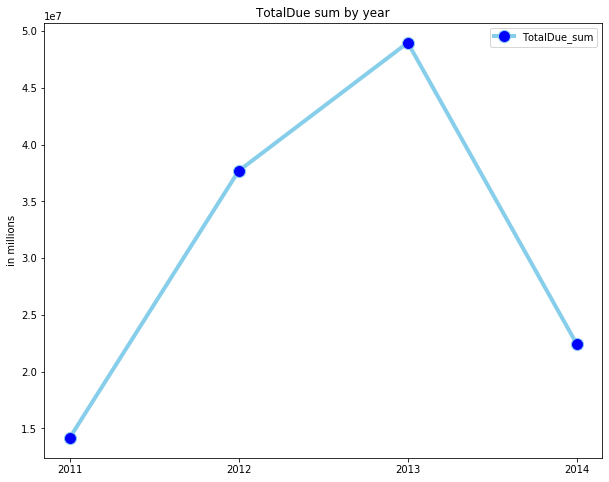

In [9]:
plt.figure (figsize = (10, 8))

plt.plot('Year', 'TotalDue_sum', data=summary_yearly, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.title('TotalDue sum by year')
plt.ylabel('in millions')


Text(0.5, 1.0, 'TotalDue mean by year')

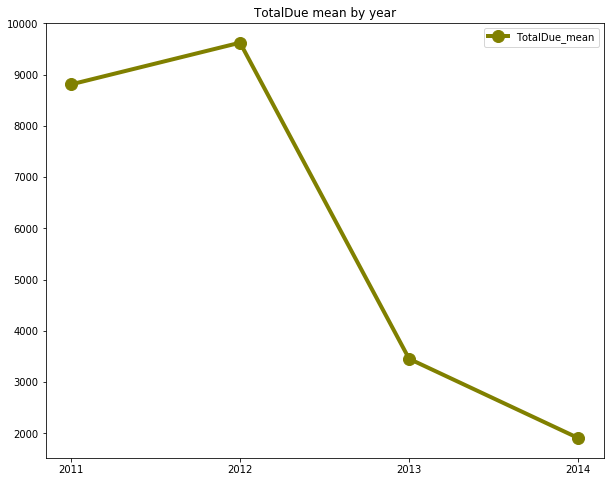

In [10]:
plt.figure (figsize = (10, 8))

plt.plot('Year', 'TotalDue_mean', data=summary_yearly, marker='o', markerfacecolor='olive', markersize=12, color='olive', linewidth=4)
plt.legend()
plt.title('TotalDue mean by year')

In [11]:
country_sum = df.filter([ 'Country', 'TotalDue']).groupby('Country').sum()
country_sum = country_sum.reset_index()
country_sum


,Country,TotalDue
0,Australia,"$11,814,376.10"
1,Canada,"$18,398,929.19"
2,France,"$8,119,749.35"
3,Germany,"$5,479,819.58"
4,United Kingdom,"$8,574,048.71"
5,United States,"$70,829,863.20"


Text(0, 0.5, 'in millions')

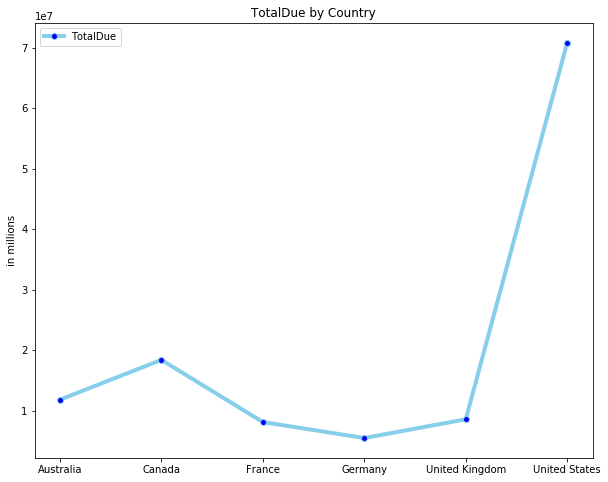

In [13]:
plt.figure (figsize = (10, 8))
plt.plot('Country','TotalDue', data=country_sum, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.title('TotalDue by Country')
plt.ylabel('in millions')


In [21]:
Stores = df[df['PersonType'] == 'SC']
Stores = Stores.filter(['StoreName','SubTotal', 'TaxAmt', 'Freight', 'TotalDue']).groupby('StoreName').sum()
Stores = Stores.reset_index()
# Sort by the biggest
Stores = Stores.sort_values(by = 'TotalDue', ascending = False)
Stores = Stores.head(15)
Stores

,StoreName,SubTotal,TaxAmt,Freight,TotalDue
57,Brakes and Gears,"$877,107.19","$85,391.92","$26,684.97","$989,184.08"
139,Excellent Riding Supplies,"$853,849.18","$82,153.66","$25,673.02","$961,675.86"
604,Vigorous Exercise Company,"$841,908.77","$85,419.55","$26,693.61","$954,021.92"
562,Totes & Baskets Company,"$816,755.58","$78,511.42","$24,534.82","$919,801.82"
445,Retail Mall,"$799,277.90","$77,766.83","$24,302.13","$901,346.86"
94,Corner Bicycle Supply,"$787,773.04","$75,670.37","$23,646.99","$887,090.41"
370,Outdoor Equipment Store,"$746,317.53","$72,799.26","$22,749.77","$841,866.55"
553,Thorough Parts and Repair Services,"$740,985.83","$71,230.55","$22,259.55","$834,475.93"
250,"Health Spa, Limited","$730,798.71","$71,263.28","$22,269.77","$824,331.77"
197,Fitness Toy Store,"$727,272.65","$70,941.64","$22,169.26","$820,383.55"


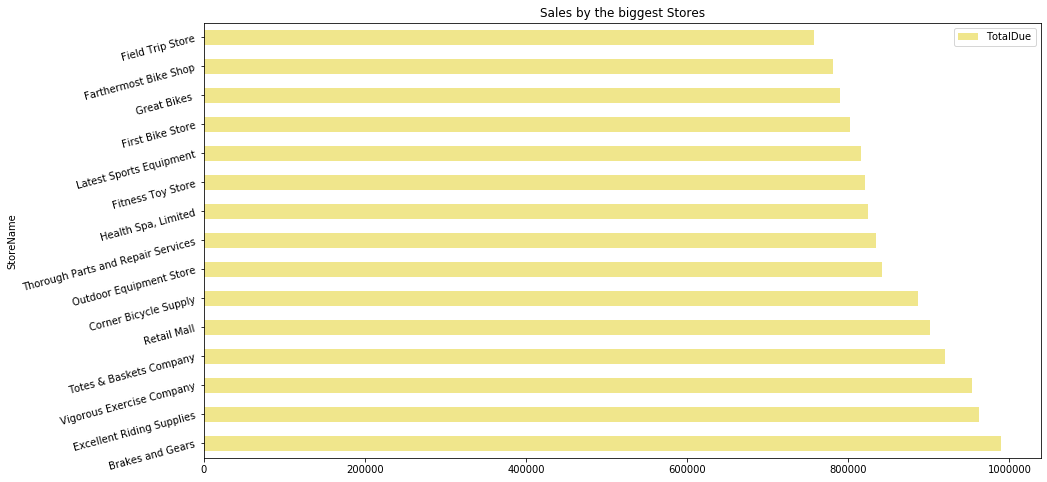

In [26]:
Stores.plot.barh (x = 'StoreName', y = 'TotalDue', figsize = (15, 8), rot = 15, color = 'khaki')
plt.title('Sales by the biggest Stores')
plt.legend()